# Question

Build a simple cnn model using a pytorch library

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dogs vs Cats dataset
transform = transforms.Compose(
    [transforms.Resize((32, 32)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = ImageFolder(root='/content/drive/MyDrive/DL_tutorial/train', transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = ImageFolder(root='/content/drive/MyDrive/DL_tutorial/test', transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('dogs', 'cats')

In [ ]:
# Define a CNN
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [ ]:
# Define a Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
# Train the network
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

Finished Training


In [ ]:
# Save the model
torch.save(net.state_dict(), '/content/drive/My Drive/cat_dog_classifier.pth')

In [ ]:
# Testing loop
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy on the test images: %d %%' % (100 * correct / total))



Accuracy on the test images: 50 %


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
# Function to classify a given image and display it along with the result
def classify_and_display_image(image_path):
    image = Image.open(image_path)
    image_tensor = transform(image).unsqueeze(0)
    output = net(image_tensor)
    _, predicted = torch.max(output, 1)

    # Determine the class label
    class_label = "dog" if predicted.item() == 0 else "cat"

    # Display the image and classification result
    img = mpimg.imread(image_path)
    imgplot = plt.imshow(img)
    plt.title(f"Classification Result: It's a {class_label}")
    plt.axis('off')
    plt.show()

In [ ]:
!pip install Pillow
from PIL import Image

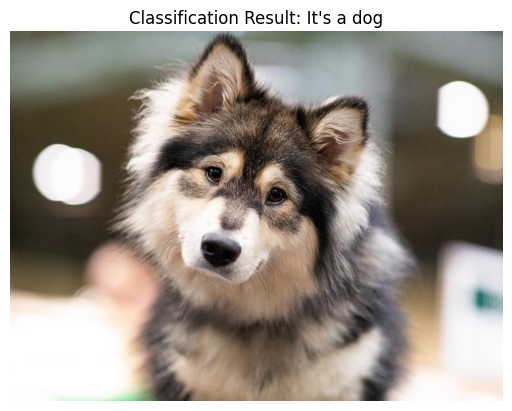

In [ ]:
# Example usage:
image_path = '/content/drive/MyDrive/DL_tutorial/test/dogs/dog_258.jpg'
classify_and_display_image(image_path)
